In [1]:
import openmc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- Add project root to path ---
import sys
import os
# Prepend project root to take precedence
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
# --------------------------------

In [3]:
from analysis.common_plotting import plot_phir_slice, plot_phir_slice_log
from analysis.processing import load_tally_data, create_individual_source_matrices, save_mesh_data_as_npz, save_full_source_data_as_npz, save_individual_source_matrices_as_npz

(2, 3, 95, 40)
Plot saved successfully to full_run_flux_plot.png
Log scale plot saved successfully to full_run_flux_plot_log.png


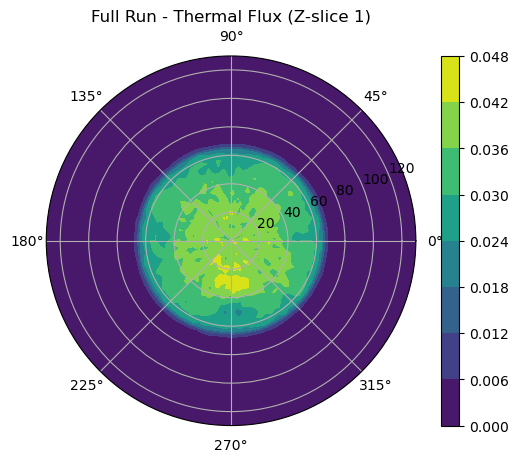

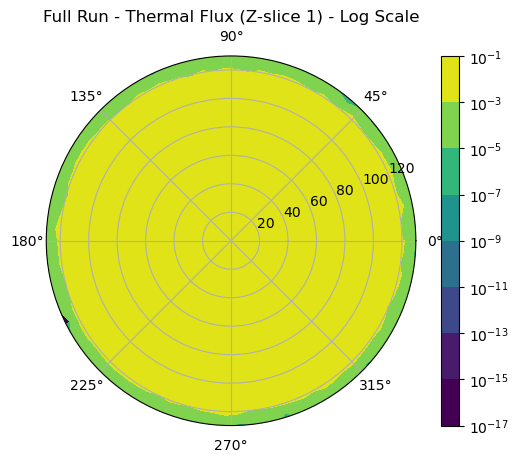

In [ ]:
# --- 1. Setup ---
SP_FILE = '../data/run_full_source_flat/statepoint.10.h5'
TALLY_NAME = 'cyl_tally'
Z_SLICE_INDEX = 1 
ENERGY_BIN_INDEX = 0 # 0 = Thermal, 1 = Fast

mean_full_source_data, mesh = load_tally_data(SP_FILE, TALLY_NAME, 'mean', True)
stdev_full_source_data, _ = load_tally_data(SP_FILE, TALLY_NAME, 'std_dev', True)
print(mean_full_source_data.shape)


mean_flux_energy_bin_1 = mean_full_source_data[0].flatten(order='F')
ax = plot_phir_slice(mean_flux_energy_bin_1, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)


group_name = "Thermal" if ENERGY_BIN_INDEX == 0 else "Fast"
ax.set_title(f"Full Run - {group_name} Flux (Z-slice {Z_SLICE_INDEX})")

output_filename = "full_run_flux_plot.png"
plt.savefig(output_filename)
print(f"Plot saved successfully to {output_filename}")

ax_log = plot_phir_slice_log(mean_flux_energy_bin_1, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax_log.set_title(f"Full Run - {group_name} Flux (Z-slice {Z_SLICE_INDEX}) - Log Scale")
output_filename_log = "full_run_flux_plot_log.png"
plt.savefig(output_filename_log)
print(f"Log scale plot saved successfully to {output_filename_log}")

In [6]:
flux_matrices = create_individual_source_matrices(base_dir='data/run_individual_sources_flat', tally_name='cyl_tally')

Mean Thermal Flux Matrix Shape: (11400, 186)
Test Mat Shape: (11400,)
Plot saved successfully to individual_sources_flux_plot.png
Log scale plot saved successfully to individual_sources_flux_plot_log.png


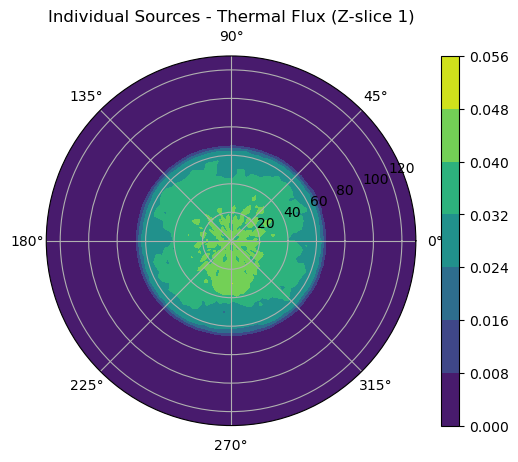

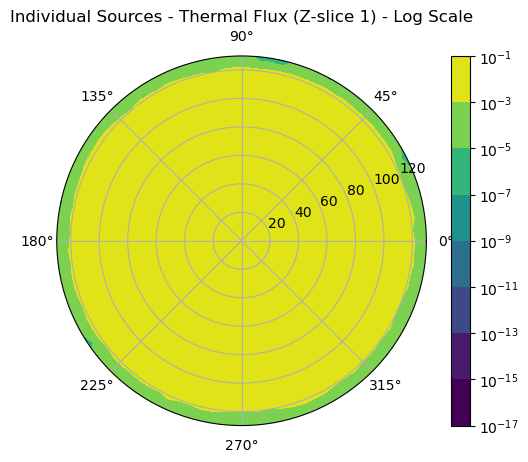

In [7]:
mean_thermal_flux_matrix = flux_matrices['thermal_mean']
stdev_thermal_flux_matrix = flux_matrices['thermal_stdev']
print("Mean Thermal Flux Matrix Shape:", mean_thermal_flux_matrix.shape)
test_mat = np.dot(mean_thermal_flux_matrix, np.ones(mean_thermal_flux_matrix.shape[1]))
print("Test Mat Shape:", test_mat.shape)

ax = plot_phir_slice(test_mat, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title(f"Individual Sources - {group_name} Flux (Z-slice {Z_SLICE_INDEX})")
output_filename_individual = "individual_sources_flux_plot.png"
plt.savefig(output_filename_individual)
print(f"Plot saved successfully to {output_filename_individual}")

ax_log = plot_phir_slice_log(test_mat, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax_log.set_title(f"Individual Sources - {group_name} Flux (Z-slice {Z_SLICE_INDEX}) - Log Scale")
output_filename_individual_log = "individual_sources_flux_plot_log.png"
plt.savefig(output_filename_individual_log)
print(f"Log scale plot saved successfully to {output_filename_individual_log}")



Mean Fast Flux Matrix Shape: (11400, 186)
Test Mat Shape: (11400,)
Plot saved successfully to individual_sources_flux_plot.png
Log scale plot saved successfully to individual_sources_flux_plot_log.png


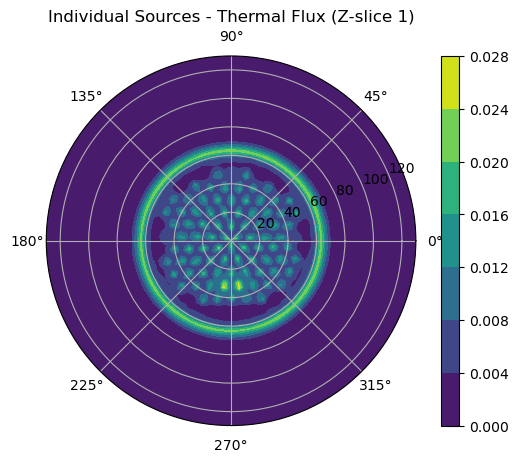

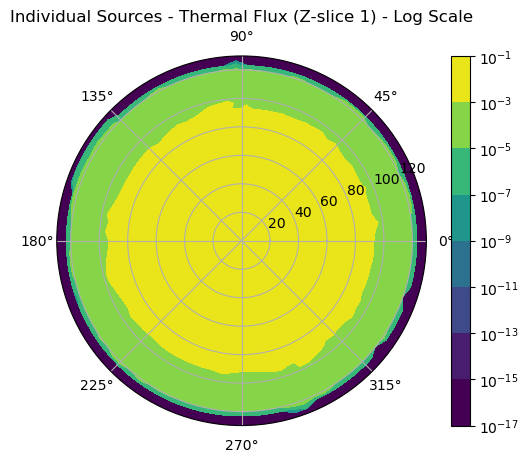

In [8]:
mean_fast_flux_matrix = flux_matrices['fast_mean']
stdev_fast_flux_matrix = flux_matrices['fast_stdev']
print("Mean Fast Flux Matrix Shape:", mean_fast_flux_matrix.shape)
test_mat = np.dot(mean_fast_flux_matrix, np.ones(mean_fast_flux_matrix.shape[1]))
print("Test Mat Shape:", test_mat.shape)

ax = plot_phir_slice(test_mat, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax.set_title(f"Individual Sources - {group_name} Flux (Z-slice {Z_SLICE_INDEX})")
output_filename_individual = "individual_sources_flux_plot.png"
plt.savefig(output_filename_individual)
print(f"Plot saved successfully to {output_filename_individual}")

ax_log = plot_phir_slice_log(test_mat, mesh.volumes, mesh.phi_grid, mesh.r_grid, slice_index=1)
ax_log.set_title(f"Individual Sources - {group_name} Flux (Z-slice {Z_SLICE_INDEX}) - Log Scale")
output_filename_individual_log = "individual_sources_flux_plot_log.png"
plt.savefig(output_filename_individual_log)
print(f"Log scale plot saved successfully to {output_filename_individual_log}")

In [ ]:
### Save Data as .npz Files ###

save_mesh_data_as_npz(mesh, file_name='mesh_data.npz')
save_full_source_data_as_npz(mean_full_source_data, stdev_full_source_data, file_path='data/analysis_npz_files', mean_file_name='full_source_mean.npz', stdev_file_name='full_source_stdev.npz')
save_individual_source_matrices_as_npz(mean_fast_flux_matrix, mean_fast_flux_matrix, stdev_thermal_flux_matrix, stdev_fast_flux_matrix, 
                                       file_path='data/analysis_npz_files', thermal_mean_file_name_template='thermal_mean_matrix.npz', 
                                       fast_mean_file_name_template='fast_mean_matrix.npz', 
                                       thermal_stdev_file_name_template='thermal_stdev_matrix.npz', 
                                       fast_stdev_file_name_template='fast_stdev_matrix.npz')




Mesh data saved to /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/mesh_data.npz
Full source tally data saved to /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/full_source_mean.npz and /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/full_source_stdev.npz
Individual source tally data saved to /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/thermal_mean_matrix.npz, /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/fast_mean_matrix.npz, /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/thermal_stdev_matrix.npz, and /home/sg44769/OpenMC-flux-decomposition/data/analysis_npz_files/fast_stdev_matrix.npz
